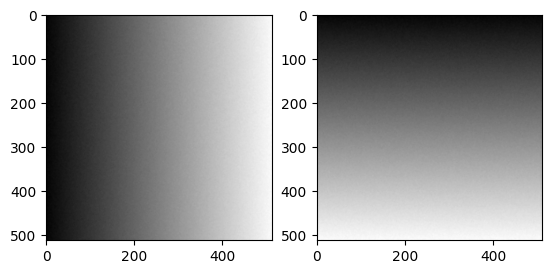

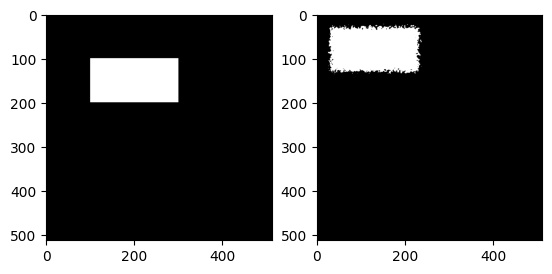

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as nd

nrows, ncols = 512, 512
image = np.zeros((nrows, ncols), dtype=np.float32)
image[100:200, 100:300] = 1.0

# Suppose we would like to transform this image 50 pixels to the right and 100 pixels down
# Forward diffrences:
# new_image = np.zeros((nrows, ncols), dtype=np.float32)
# row_translation = 100
# col_translation = 70
# # new_image[i + 100, j + 50] = image[i, j]
# new_image[row_translation:, col_translation:] = image[:-row_translation,:-col_translation]

# Backward differences:
# x_grid = np.zeros_like(image)
# y_grid = np.zeros_like(image)
# for i in range(nrows):
#   for j in range(ncols):
#     x_grid[i, j] = j
#     y_grid[i, j] = i

x_grid, y_grid = np.meshgrid(np.arange(ncols), np.arange(nrows))
row_translation = 100
col_translation = 70
# x_grid = x_grid - col_translation
# y_grid = y_grid - row_translation
x_grid = x_grid + 70 + nd.gaussian_filter(np.random.randn(nrows, ncols)*10, sigma=1)
y_grid = y_grid + 70 + nd.gaussian_filter(np.random.randn(nrows, ncols)*10, sigma=1)
new_image = nd.map_coordinates(image, [y_grid, x_grid], order=3)




plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(x_grid, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(y_grid, cmap='gray')
plt.show()

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray', vmin=0, vmax=1)
plt.show()

[[  0.70710678  -0.70710678 100.        ]
 [  0.70710678   0.70710678  50.        ]
 [  0.           0.           1.        ]]


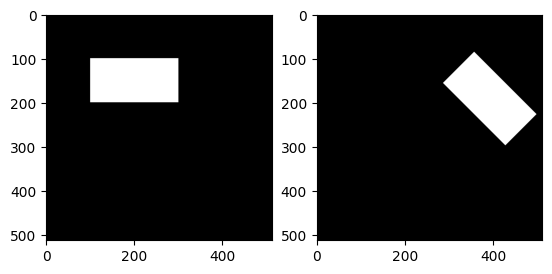

In [30]:
def generate_rigid_matrix(x_translation, y_translation, rotation):
  rotation = rotation * np.pi / 180
  transform = np.array([
      [np.cos(rotation), -np.sin(rotation), x_translation],
      [np.sin(rotation), np.cos(rotation), y_translation],
      [0, 0, 1]
  ])
  return transform

def center_transform(transform, x_size, y_size):
  C = generate_rigid_matrix(-(x_size - 1) / 2, -(y_size - 1) / 2, 0)
  return np.linalg.inv(C) @ transform @ C

def rigid_dot(x_grid, y_grid, transform):
  """
  v = [x, y, 1]
  v' = transform @ v
  """
  result = transform @ np.array([x_grid.ravel(), y_grid.ravel(), np.ones_like(x_grid.ravel())])
  new_x_grid = result[0, :].reshape(x_grid.shape)
  new_y_grid = result[1, :].reshape(y_grid.shape)
  return new_x_grid, new_y_grid

rigid_transform = generate_rigid_matrix(100, 50, 45)
# rigid_transform = generate_rigid_matrix(0, 0, 90)
print(rigid_transform)
x_grid, y_grid = np.meshgrid(np.arange(ncols), np.arange(nrows))
new_x_grid, new_y_grid = rigid_dot(x_grid, y_grid, np.linalg.inv(center_transform(rigid_transform, ncols, nrows)))

new_image = nd.map_coordinates(image, [new_y_grid, new_x_grid], order=3)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.imshow(new_image, cmap='gray', vmin=0, vmax=1)
plt.show()